In [1]:
'''
load original df
'''

import pandas as pd
import os
import numpy as np
from functions import *
from scipy.stats import mannwhitneyu
import seaborn as sns
from statannotations.Annotator import Annotator
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore') #supresses warnings for now
#warnings.filterwarnings(action='once') #shows warnings once

dataFilePath = os.path.join(os.getcwd(),'Data')

kicsSVdf = pd.read_csv(os.path.join(dataFilePath,'kics_structural_variations.txt'), sep = '\t', header = 0)
#kicsTEdf = pd.read_csv(os.path.join(dataFilePath,'kics_transposable_elements.txt'), sep = '\t', header = 0)
lfsSVdf = pd.read_csv(os.path.join(dataFilePath,'lfs_structural_variations.txt'), sep = '\t', header = 0)
#lfsTEdf = pd.read_csv(os.path.join(dataFilePath,'lfs_transposable_elements.txt'), sep = '\t', header = 0)
kicsClinicdf = pd.read_csv(os.path.join(dataFilePath,'kics_clinical_main.tsv'), sep = '\t', header = 0)
lfsClinicdf = pd.read_csv(os.path.join(dataFilePath,'lfs_clinical_main.tsv'), sep = '\t', header = 0)


In [2]:
#kicsSVdf['sample_id'].nunique()
lfsSVdf['sample_id'].nunique()

85

In [3]:
"""
filter dfs
"""

sns.set(font_scale=1.5)

kicsSVdf = maxGDAFFilter('GD_AF', kicsSVdf)
lfsSVdf = maxGDAFFilter('GD_AF', lfsSVdf)

In [4]:
listValSearch = ['291775', '298313', '315666', '320118', '18_1907']
# searched for kID of 63, 83, 156, 171, 219
# kID 120 141 and 232 do not have any matches...
#what would make this that much better is if it was a dict. Computationally less heavy?

for i in listValSearch: 
    kicsSVdf.drop(kicsSVdf[kicsSVdf['sample_id'].str.contains(i)==True].index, inplace = True)


In [5]:
kicsSVF = kicsSVdf.loc[(kicsSVdf['AnnotSV type'] == 'full') & (kicsSVdf['GD_AF'] < 0.01)]
lfsSVF = lfsSVdf.loc[(lfsSVdf['AnnotSV type'] == 'full') & (lfsSVdf['GD_AF'] < 0.01)]

kicsSVF['SV chrom'] = kicsSVF['SV chrom'].astype(str)
lfsSVF['SV chrom'] = lfsSVF['SV chrom'].astype(str)

kicsSVnum = kicsSVF['sample_id'].count()
lfsSVnum = lfsSVF['sample_id'].count()


#to improve this, multi-index would be good, that way we can have less columns
mergedSVdf = pd.DataFrame(data = {'kics':kicsSVF['SV type'], 'kChrom':kicsSVF['SV chrom'], 
                                  'kId':kicsSVF['sample_id'], 'lId':lfsSVF['sample_id'],
                                  'lfs':lfsSVF['SV type'], 'lChrom':lfsSVF['SV chrom']})


In [6]:
kicsSVF['sample_id'].nunique()
#lfsSVF['sample_id'].nunique()

241

             kics  lfs
2342          NaN  NaN
2346          NaN  NaN
2348          NaN  NaN
2451     0.000047  NaN
2791          NaN  NaN
...           ...  ...
5120137       NaN  NaN
5120148  0.003424  NaN
5120164  0.000093  NaN
5120171  0.000560  NaN
5120175  0.000100  NaN

[37110 rows x 2 columns]
MannwhitneyuResult(statistic=30936618.5, pvalue=0.4991298095722455)


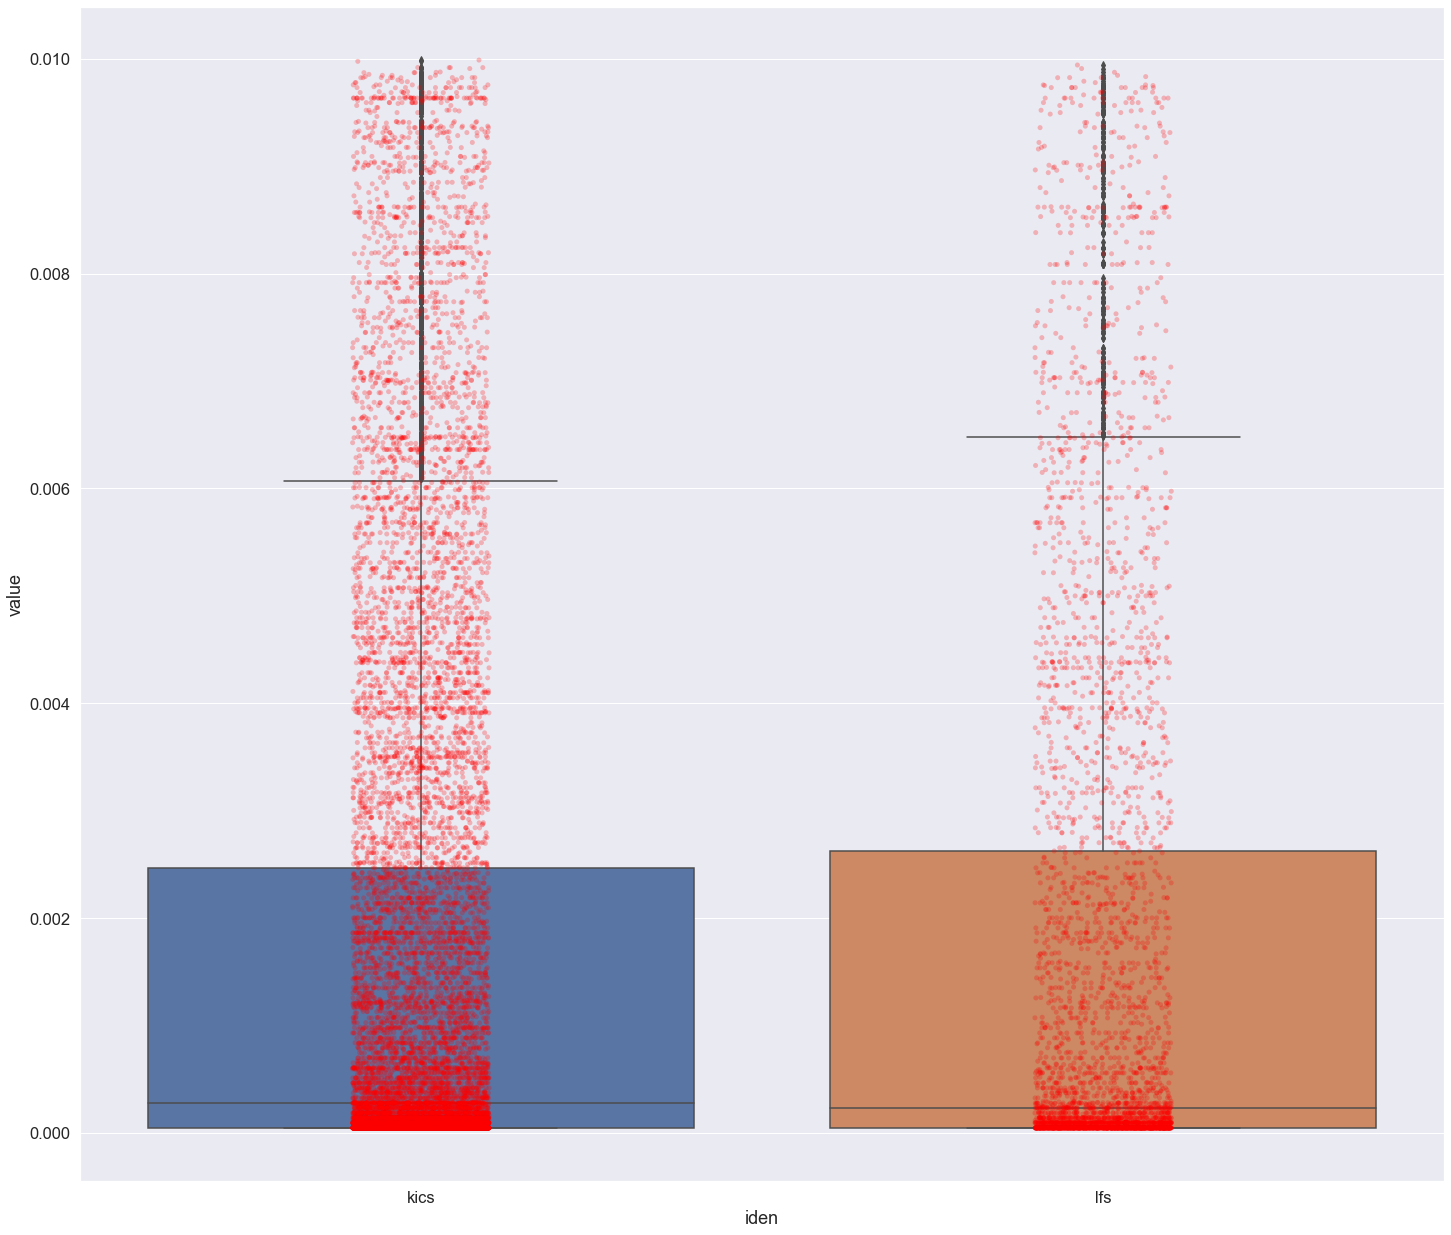

In [7]:
mergedGDAF = pd.DataFrame(data = {'kics':kicsSVF['GD_AF'],
                                'lfs':lfsSVF['GD_AF']})

mergedGDAF.replace(to_replace = [-1], value = np.nan, inplace=True)
mergedGDAF.replace(to_replace = ['-1'], value = np.nan, inplace=True)

titles = ['kics','lfs']
columns = titles

print(mergedGDAF)
boxplotPoints(titles, columns, mergedGDAF)


In [8]:
"""
1. Graph for frequency of SV types
2. Graphs for frequency of SV types specific to chromosomes

Function to graph bar graphs
"""
    
xLabels = ['DEL','DUP','INV']
uniqueLabels = ['1','2','3','4','5','6','7','8','9','10',
                '11','12','13','14','15','16','17','18','19','20','21','22','X','Y']

deldf = mergedSVdf.loc[(mergedSVdf['kics'] == 'DEL') | (mergedSVdf['lfs']=='DEL')]
dupdf = mergedSVdf.loc[(mergedSVdf['kics'] == 'DUP') | (mergedSVdf['lfs']=='DUP')]
invdf = mergedSVdf.loc[(mergedSVdf['kics'] == 'INV') | (mergedSVdf['lfs']=='INV')]

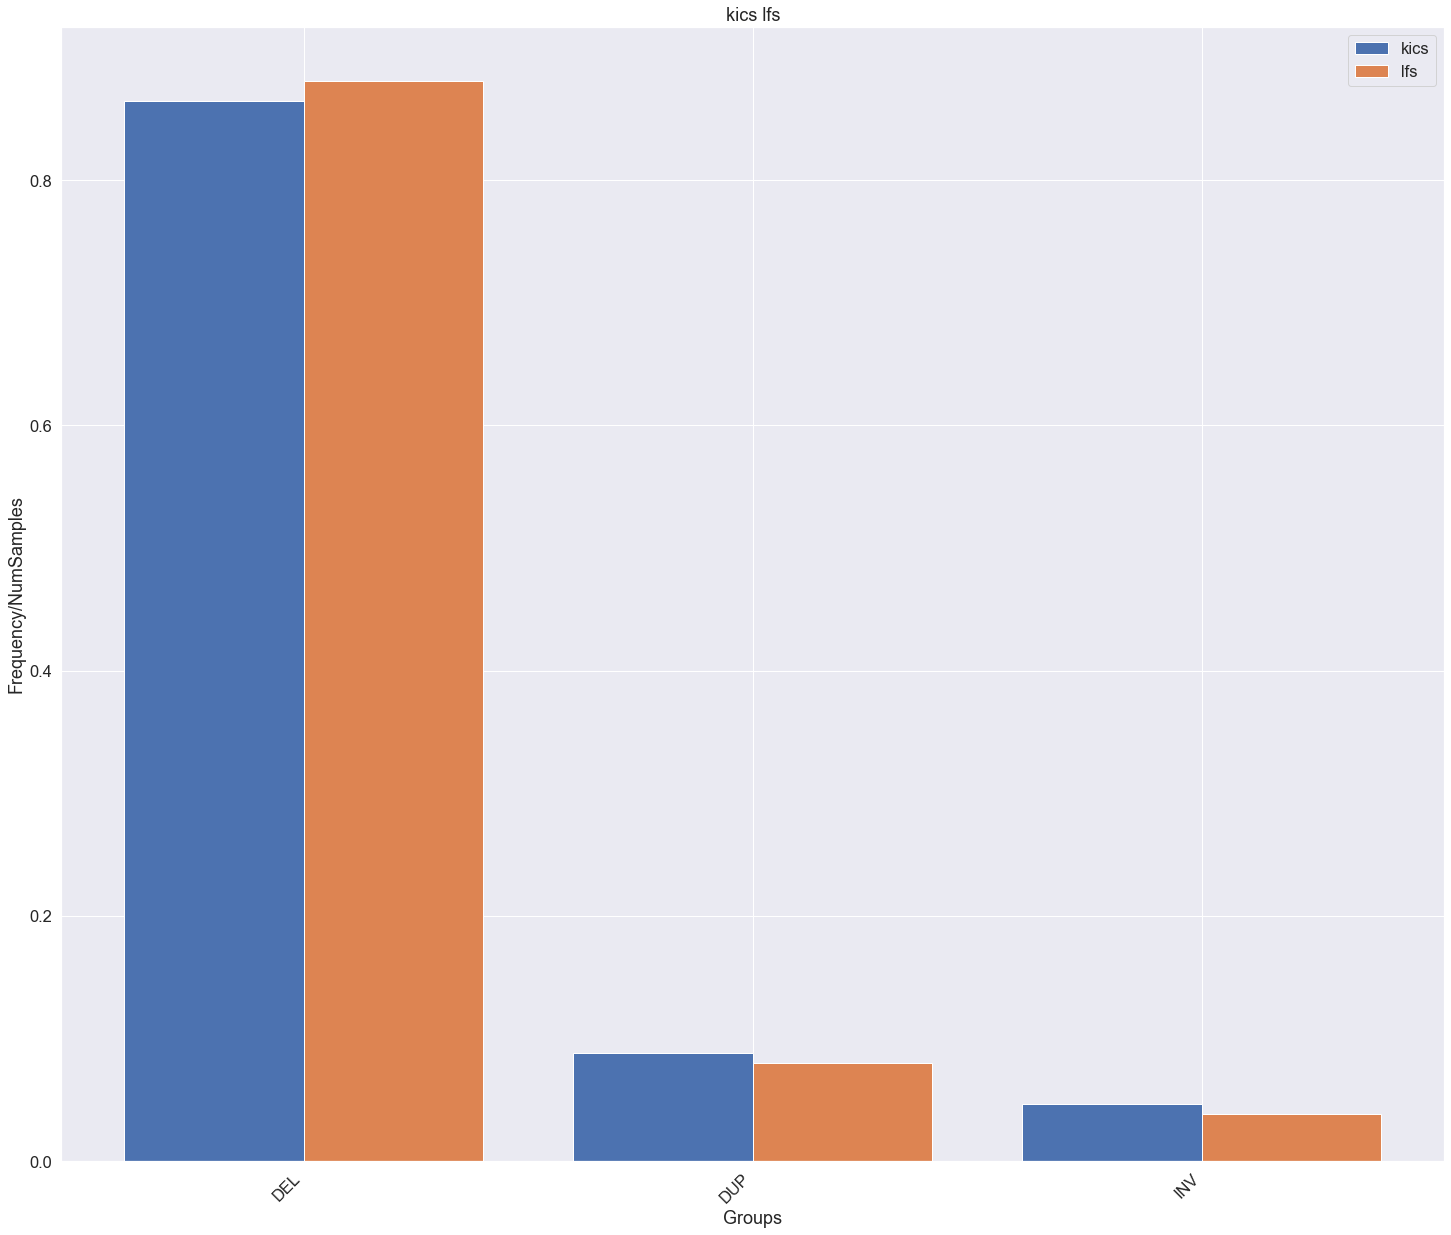

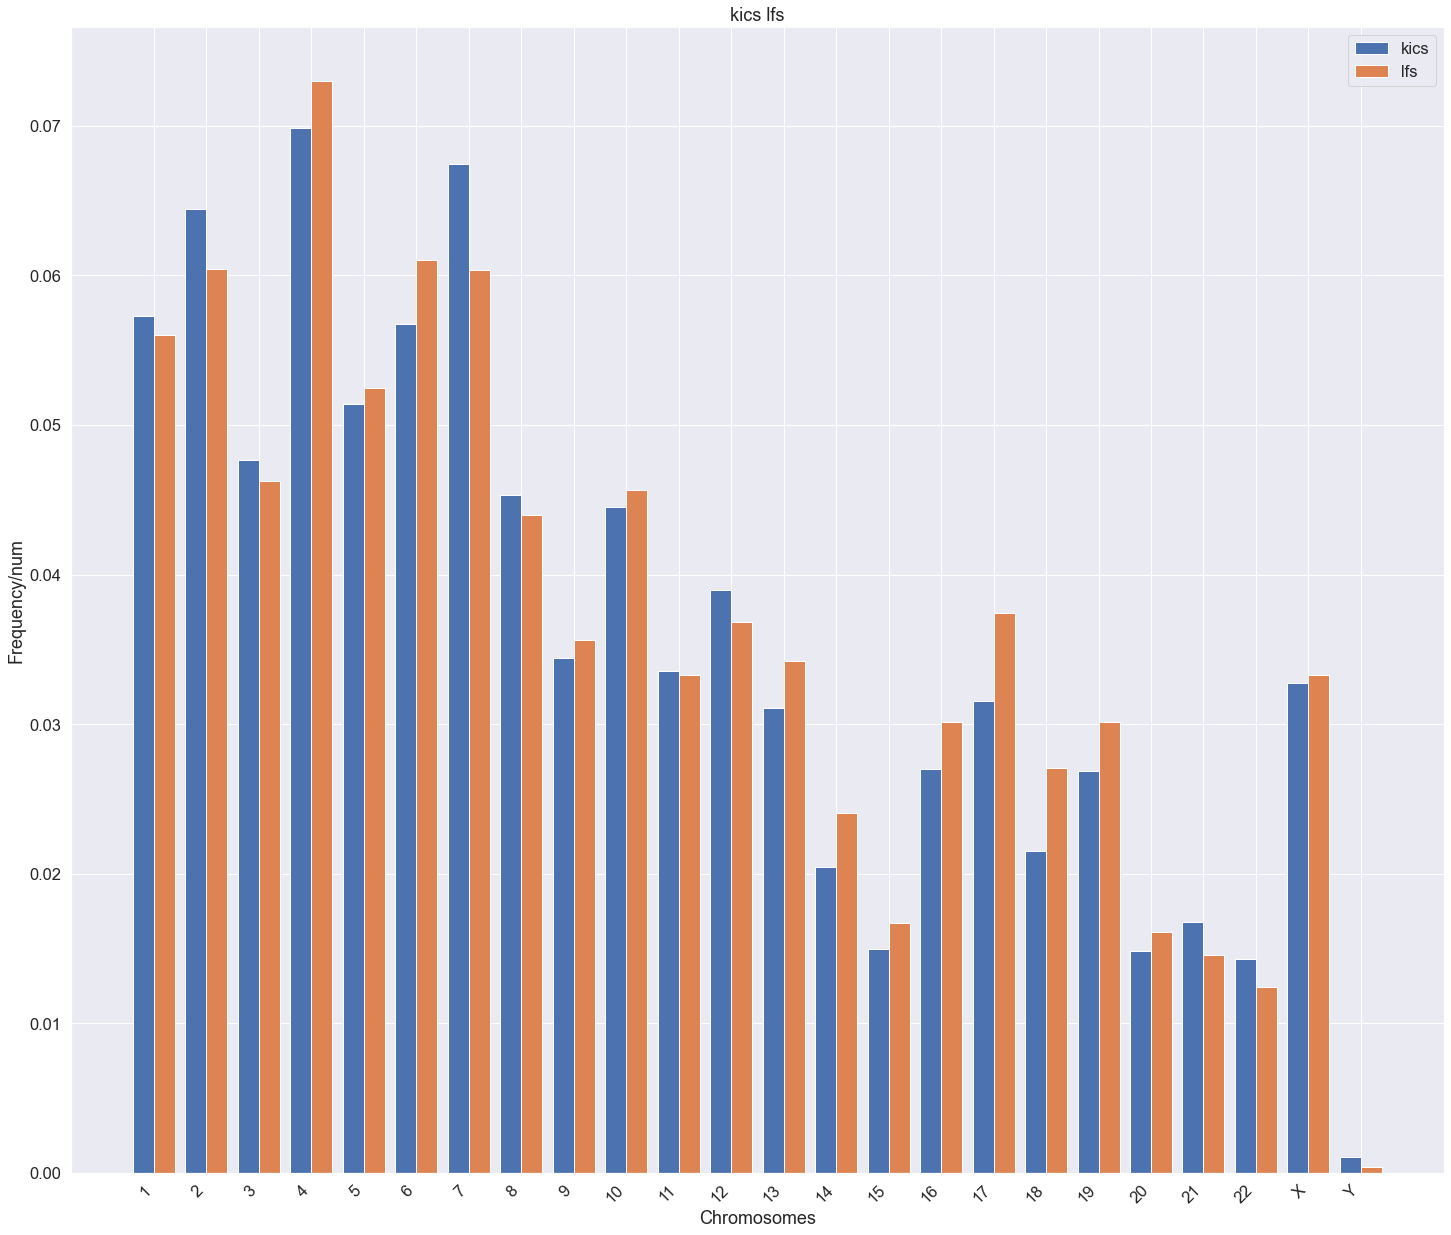

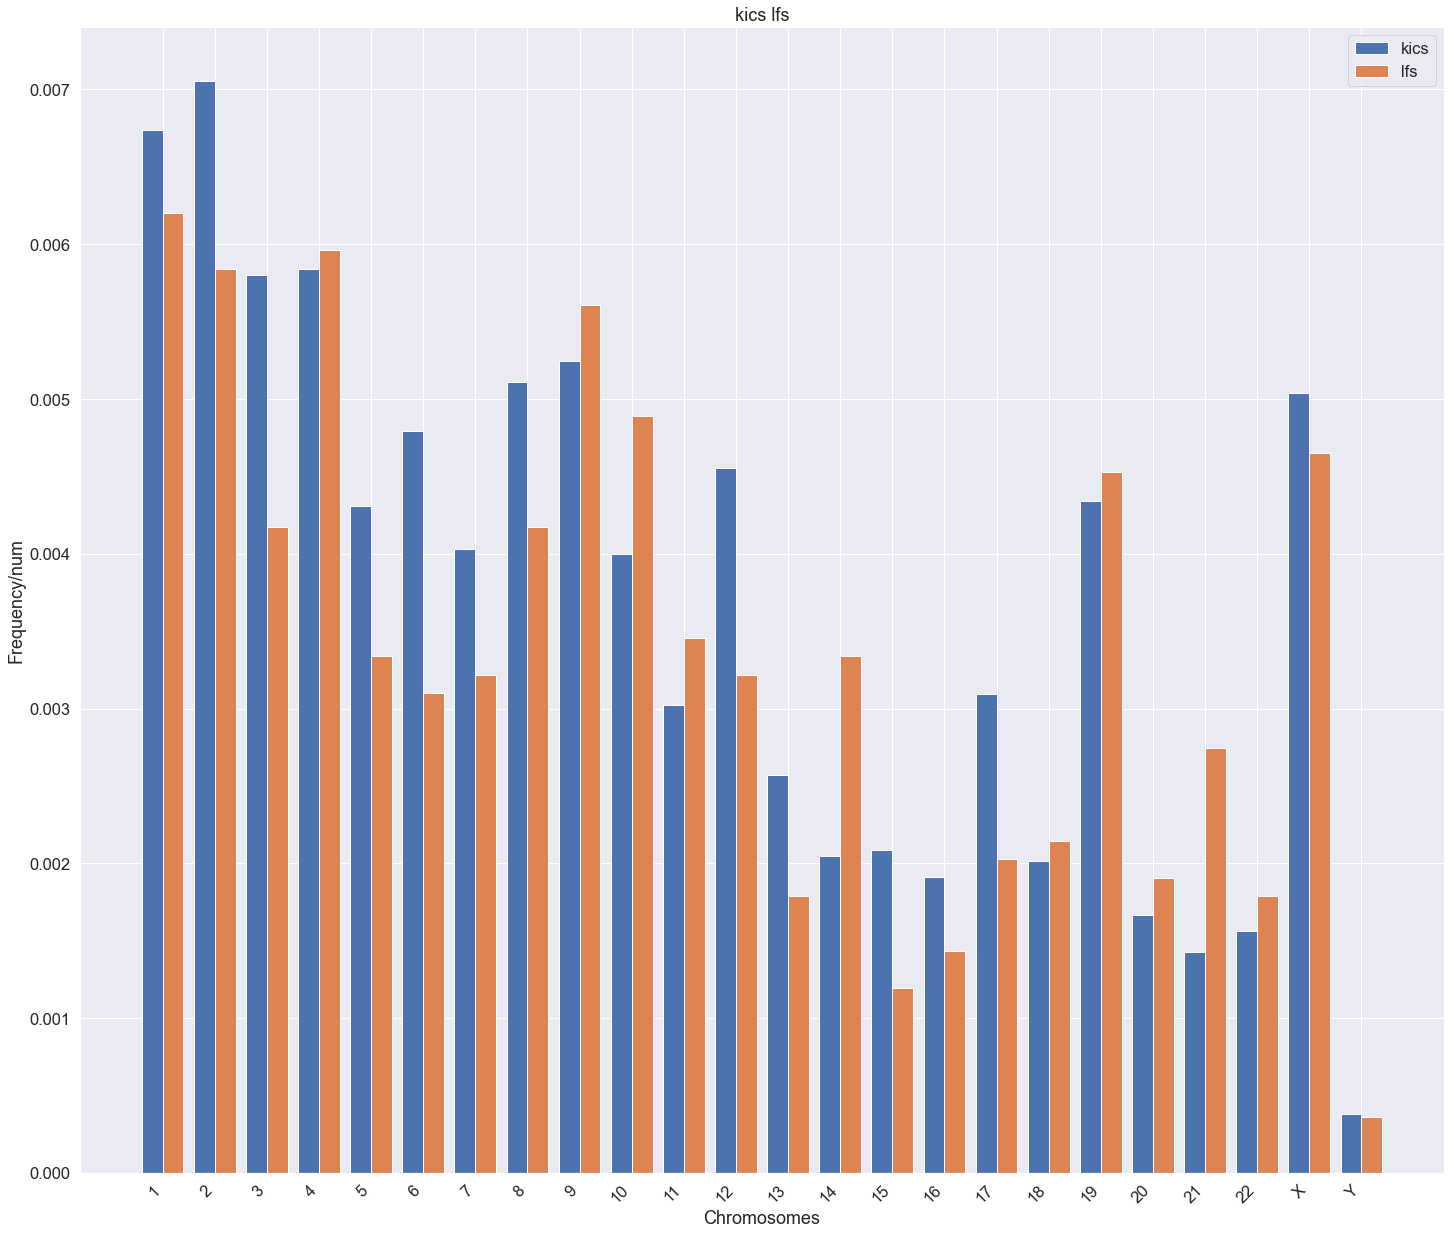

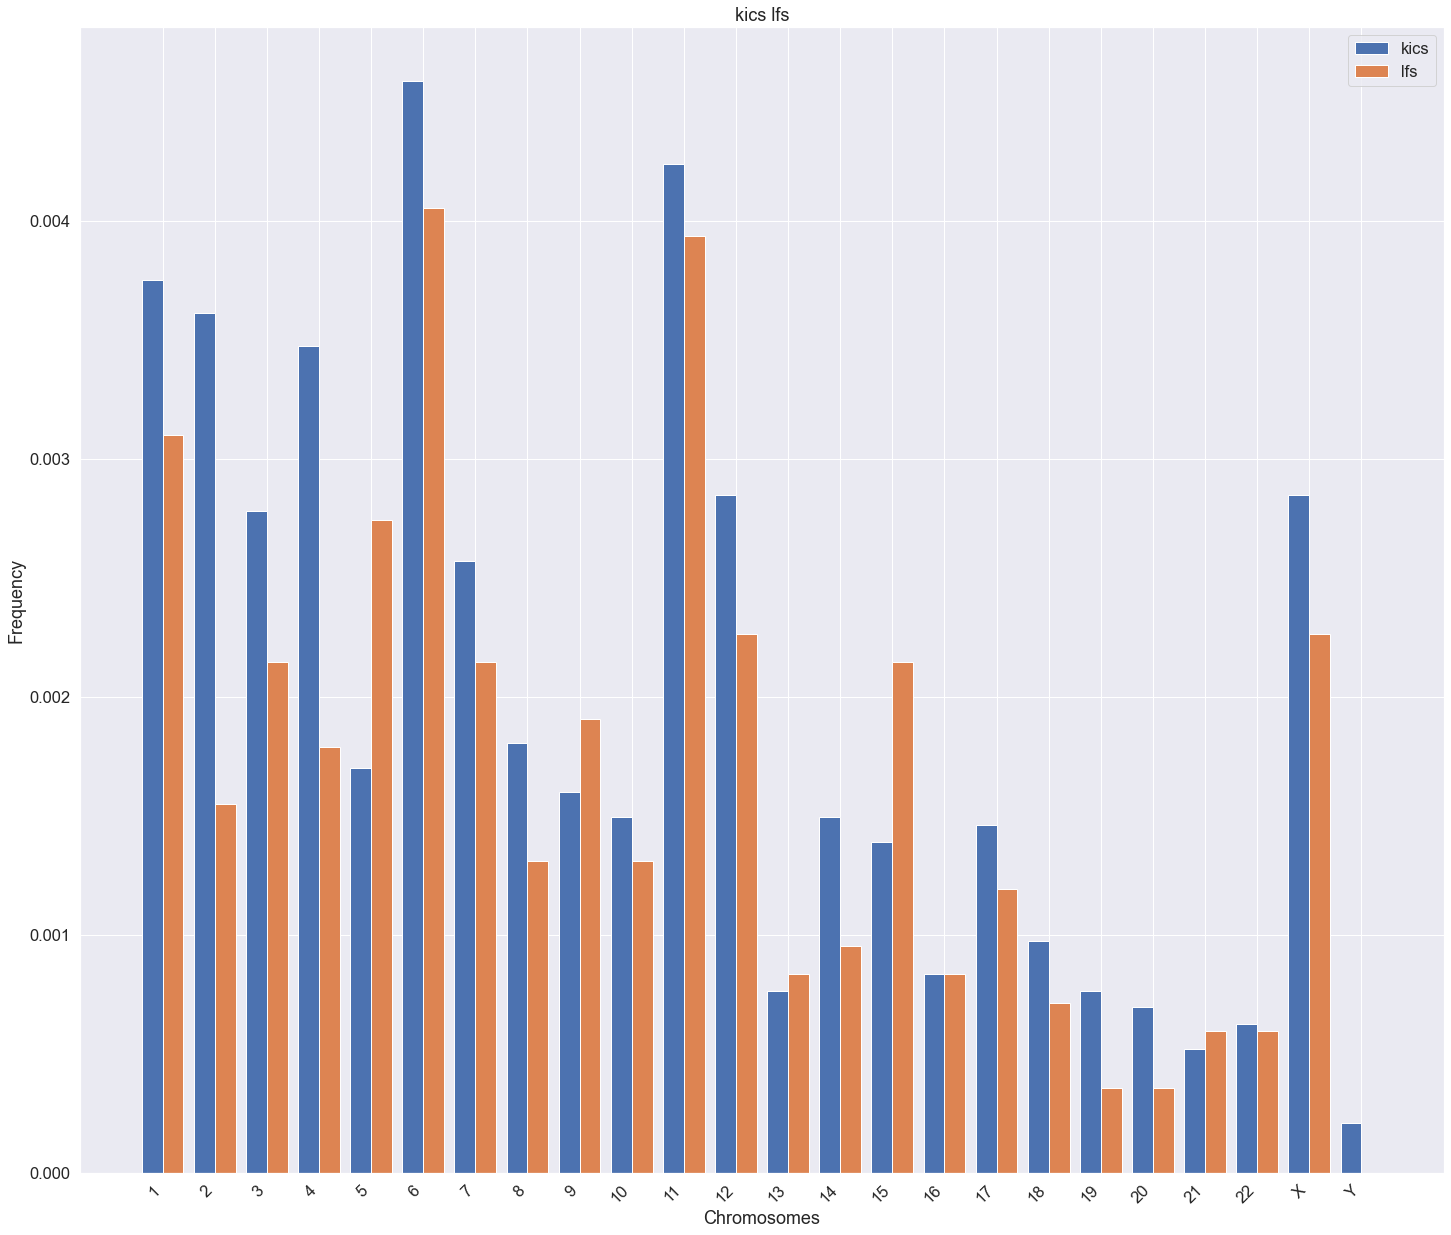

In [9]:
#Overall
BarGraphNormalized('kics', 'lfs', mergedSVdf, 'kics', 'lfs', 'Groups', 'Frequency/NumSamples', 
                   kicsSVnum, lfsSVnum, xLabels)

#Deletions 
BarGraphNormalized('kics', 'lfs', deldf, 'kChrom', 'lChrom', 'Chromosomes', 'Frequency/num', 
                   kicsSVnum, lfsSVnum, uniqueLabels)

#Duplicates
BarGraphNormalized('kics', 'lfs', dupdf, 'kChrom', 'lChrom', 'Chromosomes', 'Frequency/num', 
                   kicsSVnum, lfsSVnum, uniqueLabels)

#Inversions
BarGraphNormalized('kics', 'lfs', invdf, 'kChrom', 'lChrom', 'Chromosomes', 'Frequency', 
                   kicsSVnum, lfsSVnum, uniqueLabels)

In [10]:
"""
Testing group by
"""
#probably a better way to do this

kicsSVTypedf = pd.DataFrame(data = {'kics':kicsSVF['SV type'], 
                                  'kId':kicsSVF['sample_id']})
lfsSVTypedf = pd.DataFrame(data = {'lId':lfsSVF['sample_id'],
                                  'lfs':lfsSVF['SV type']})


##kics
ktemp = kicsSVTypedf.groupby(['kId']).value_counts()

##lfs
ltemp = lfsSVTypedf.groupby(['lId']).value_counts()

#get unique identifiers

uniqueK = kicsSVTypedf['kId'].unique()
uniqueL = lfsSVTypedf['lId'].unique()

#probably a better way, but iterate through the series and get the data 

# SV Type

In [51]:
kicsOverall = kicsSVTypedf.drop(['kics'],axis=1)
#print(kicsOverall['kId'].nunique())
kicsOverall = kicsOverall.value_counts()


#print(kicsOverall.values)
lfsOverall = lfsSVTypedf.drop(['lfs'],axis=1)#.value_counts()
print(lfsOverall['lId'].nunique())
#testing = makeUnequalDF(kicsOverall.values,lfsOverall.values)
#print(testing)
#ltemp


#boxplotPoints(['lfs','kics'], ['lfs','kics'], testing, 10, 7)

83


In [12]:
kDelData = makeDataSet(uniqueK, ktemp, 'DEL')
lDelData = makeDataSet(uniqueL, ltemp, 'DEL')
tempDelDF = makeUnequalDF(kDelData, lDelData)

print(tempDelDF)

kDupData = makeDataSet(uniqueK, ktemp, 'DUP')
lDupData = makeDataSet(uniqueL, ltemp, 'DUP')
tempDupDF = makeUnequalDF(kDupData, lDupData)

kInvData = makeDataSet(uniqueK, ktemp, 'INV')
lInvData = makeDataSet(uniqueL, ltemp, 'INV')
tempInvDF = makeUnequalDF(kInvData, lInvData)

     kics    lfs
0     176  122.0
1      36   15.0
2     106  140.0
3      95  105.0
4      13  120.0
..    ...    ...
236    51    NaN
237   173    NaN
238     2    NaN
239   113    NaN
240   165    NaN

[241 rows x 2 columns]


## Del 

MannwhitneyuResult(statistic=11853.5, pvalue=0.011881811050079119)


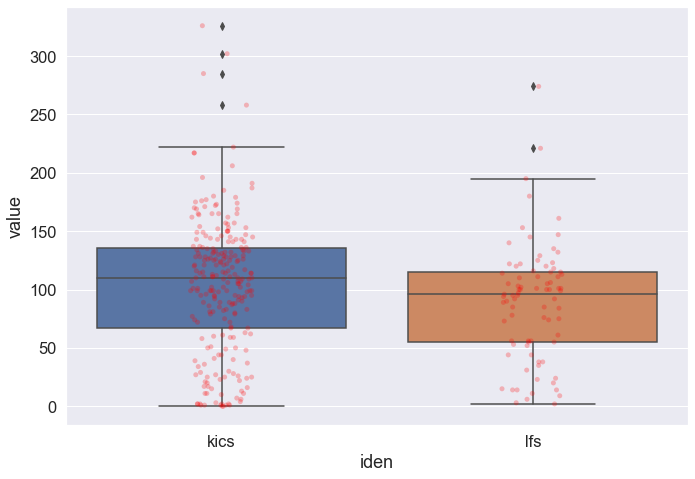

In [13]:
boxplotPoints(titles, columns, tempDelDF, 10, 7)

## Dup 

MannwhitneyuResult(statistic=12426.0, pvalue=0.0009697425806146196)


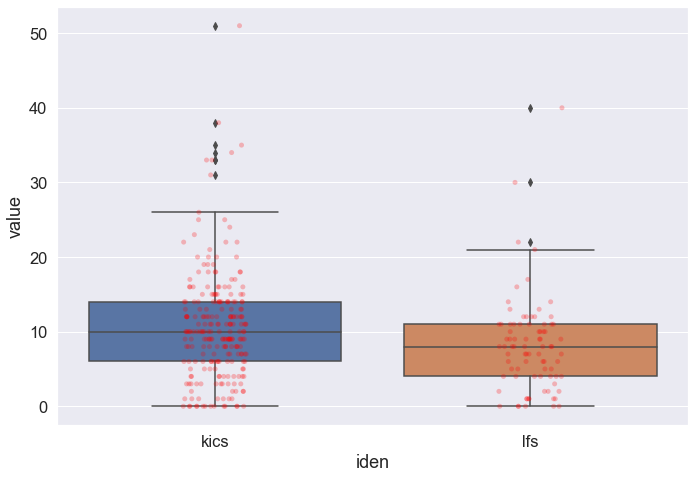

In [14]:
boxplotPoints(titles, columns, tempDupDF, 10, 7)

## Inv 

MannwhitneyuResult(statistic=12554.0, pvalue=0.000498224722188963)


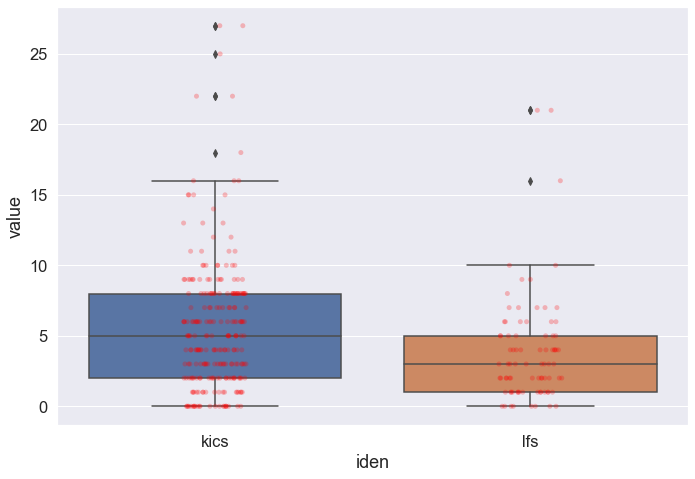

In [15]:
boxplotPoints(titles, columns, tempInvDF, 10, 7)

In [16]:
"""
Chromosome Specific
Cleaned up
""" 


kicsMore = pd.DataFrame(data = {'SV':kicsSVF['SV type'], 'chrom':kicsSVF['SV chrom'], 
                                  'id':kicsSVF['sample_id']})
lfsMore = pd.DataFrame(data = {'id':lfsSVF['sample_id'], 'chrom':lfsSVF['SV chrom'],
                                  'SV':lfsSVF['SV type']})

numBPChrom = [249250621, 243199373, 198022430, 191154276, 180915260, 
              171115067, 159138663, 146364022, 141213431, 135534747,
              135006516, 133851895, 115169878, 107349540, 102531392,
              90354753, 81195210, 78077248, 59128983, 63025520,
              48129895, 51304566, 155270560, 59373566]

grouping = ['id', 'SV', 'chrom']



#If you have time, you should make it so that the plot can have the points showing/scattered plot



LFS
      index chrom    normalized dataset
0         0     1  3.610824e-08     lfs
48        0     1  5.616837e-08     lfs
72        0     1  2.407216e-08     lfs
96        0     1  3.610824e-08     lfs
120       0     1  1.604810e-08     lfs
...     ...   ...           ...     ...
1824      0     1  2.808418e-08     lfs
1872      0     1  3.209621e-08     lfs
1896      0     1  2.808418e-08     lfs
1944      0     1  1.604810e-08     lfs
1968      0     1  2.808418e-08     lfs

[67 rows x 4 columns]
the outliers for 1 are:
None

      index chrom    normalized dataset
1         1     2  6.990150e-08     lfs
25        1     2  0.000000e+00     lfs
49        1     2  5.345409e-08     lfs
73        1     2  2.055926e-08     lfs
97        1     2  4.523038e-08     lfs
...     ...   ...           ...     ...
1873      1     2  2.055926e-08     lfs
1897      1     2  0.000000e+00     lfs
1921      1     2  2.878297e-08     lfs
1945      1     2  4.934223e-08     lfs
1969      1     2  8.22

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10_lfs vs. 10_kics: Mann-Whitney-Wilcoxon test two-sided, P_val:1.553e-01 U_stat=8.962e+03
11_lfs vs. 11_kics: Mann-Whitney-Wilcoxon test two-sided, P_val:2.488e-01 U_stat=9.158e+03
12_lfs vs. 12_kics: Mann-Whitney-Wilcoxon test two-sided, P_val:1.111e-02 U_stat=8.146e+03
13_lfs vs. 13_kics: Mann-Whitney-Wilcoxon test two-sided, P_val:6.751e-01 U_stat=9.696e+03
14_lfs vs. 14_kics: Mann-Whitney-Wilcoxon test two-sided, P_val:7.412e-01 U_stat=1.024e+04
15_lfs vs. 15_kics: Mann-Whitney-Wilcoxon test two-sided, P_val:5.164e-01 U_stat=9.532e+03
16_lfs vs. 16_kics: Mann-Whitney-Wilcoxon test two-sided, P_val:4.764e-01 U_stat=9.483e+03
17_lfs vs. 17_kics: Mann-Whitney-Wilcoxon test two-sided, P_val:7.204e-01 U_stat=9.740e+03
18_lfs vs. 18_kics: Mann-Whitney-Wilcoxon test two-sided, P_val:9.445e-01 U_stat=1.005e+04


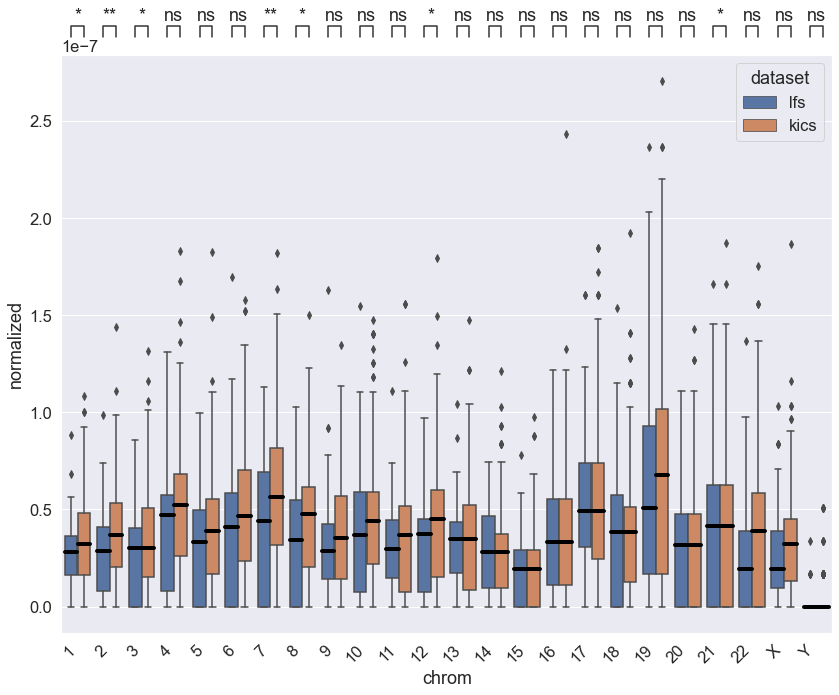

In [45]:
overallKics = kicsMore.drop(['SV'],axis=1).groupby('id').value_counts()
#print(overallKics)
#print(overallKics.loc[(5510,'2')])

normalizedOverall = pd.DataFrame()

for i in uniqueK:
    tempList = []
    for j,div in zip(uniqueLabels, numBPChrom):
        try:
            value = overallKics.loc[(i,j)]
            value = value/div
        except:
            value = 0
        
        tempList.append(value)
        
    d = {'chrom':uniqueLabels, 'normalized':tempList}
    tempdf = pd.DataFrame(d)
    normalizedOverall = pd.concat([normalizedOverall, tempdf],axis=0)

normalizedOverall['dataset']='kics'

overallLfs = lfsMore.drop(['SV'],axis=1).groupby('id').value_counts()
normalizedOverallLFS = pd.DataFrame()

for i in uniqueL:
    tempList = []
    for j,div in zip(uniqueLabels, numBPChrom):
        try:
            value = overallLfs.loc[(i,j)]
            value = value/div
        except:
            value = 0
        
        tempList.append(value)
        
    d = {'chrom':uniqueLabels, 'normalized':tempList}
    tempdf = pd.DataFrame(d)
    normalizedOverallLFS = pd.concat([normalizedOverallLFS, tempdf],axis=0)

normalizedOverallLFS['dataset']='lfs'  

normMergedDf = pd.concat([normalizedOverallLFS,normalizedOverall])
normMergedDf.reset_index(inplace=True)
from matplotlib.pyplot import figure
figure(figsize=(12,10))

BoxGraphMulti(normMergedDf, 'chrom', 'normalized', 'dataset')

LFS
     chrom   occ dataset
6120     1  16.0     lfs
7368     1  17.0     lfs
the outliers for 1 are:
None

     chrom   occ dataset
7225    10  17.0     lfs
the outliers for 10 are:
None

     chrom   occ dataset
7370    11  13.0     lfs
the outliers for 11 are:
None

Empty DataFrame
Columns: [chrom, occ, dataset]
Index: []
the outliers for 12 are:
None

     chrom   occ dataset
7372    13  11.0     lfs
the outliers for 13 are:
None

Empty DataFrame
Columns: [chrom, occ, dataset]
Index: []
the outliers for 14 are:
None

     chrom  occ dataset
7374    15  8.0     lfs
the outliers for 15 are:
None

Empty DataFrame
Columns: [chrom, occ, dataset]
Index: []
the outliers for 16 are:
None

     chrom   occ dataset
6752    17  13.0     lfs
6824    17  10.0     lfs
7376    17  10.0     lfs
the outliers for 17 are:
None

     chrom   occ dataset
6705    18  12.0     lfs
the outliers for 18 are:
None

     chrom   occ dataset
5842    19  13.0     lfs
the outliers for 19 are:
None

     chrom  

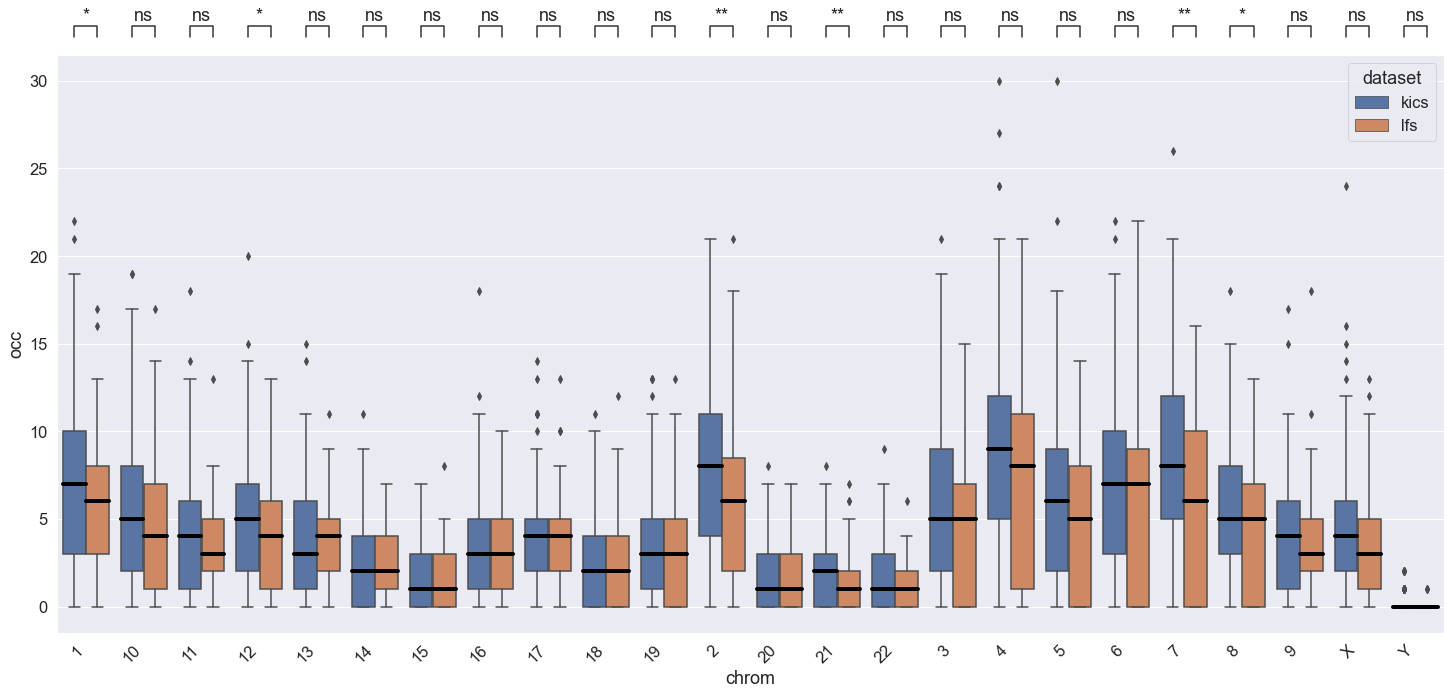

LFS
      index chrom    normalized dataset
5784      0     1  2.808418e-08     lfs
5832      0     1  5.215634e-08     lfs
5856      0     1  2.006013e-08     lfs
5880      0     1  2.808418e-08     lfs
5904      0     1  1.604810e-08     lfs
...     ...   ...           ...     ...
7608      0     1  2.006013e-08     lfs
7656      0     1  3.209621e-08     lfs
7680      0     1  2.006013e-08     lfs
7728      0     1  1.203608e-08     lfs
7752      0     1  2.808418e-08     lfs

[67 rows x 4 columns]
the outliers for 1 are:
None

      index chrom    normalized dataset
5785      1     2  6.990150e-08     lfs
5809      1     2  0.000000e+00     lfs
5833      1     2  4.523038e-08     lfs
5857      1     2  1.644741e-08     lfs
5881      1     2  4.111853e-08     lfs
...     ...   ...           ...     ...
7657      1     2  1.644741e-08     lfs
7681      1     2  0.000000e+00     lfs
7705      1     2  2.878297e-08     lfs
7729      1     2  4.523038e-08     lfs
7753      1     2  8.22

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10_kics vs. 10_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:1.820e-01 U_stat=1.098e+04
11_kics vs. 11_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:3.229e-01 U_stat=1.072e+04
12_kics vs. 12_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:2.687e-02 U_stat=1.162e+04
13_kics vs. 13_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:7.774e-01 U_stat=1.021e+04
14_kics vs. 14_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:7.091e-01 U_stat=9.730e+03
15_kics vs. 15_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:7.006e-01 U_stat=1.028e+04
16_kics vs. 16_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:6.406e-01 U_stat=1.034e+04
17_kics vs. 17_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:8.827e-01 U_stat=9.894e+03
18_kics vs. 18_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:9.028e-01 U_stat=9.912e+03


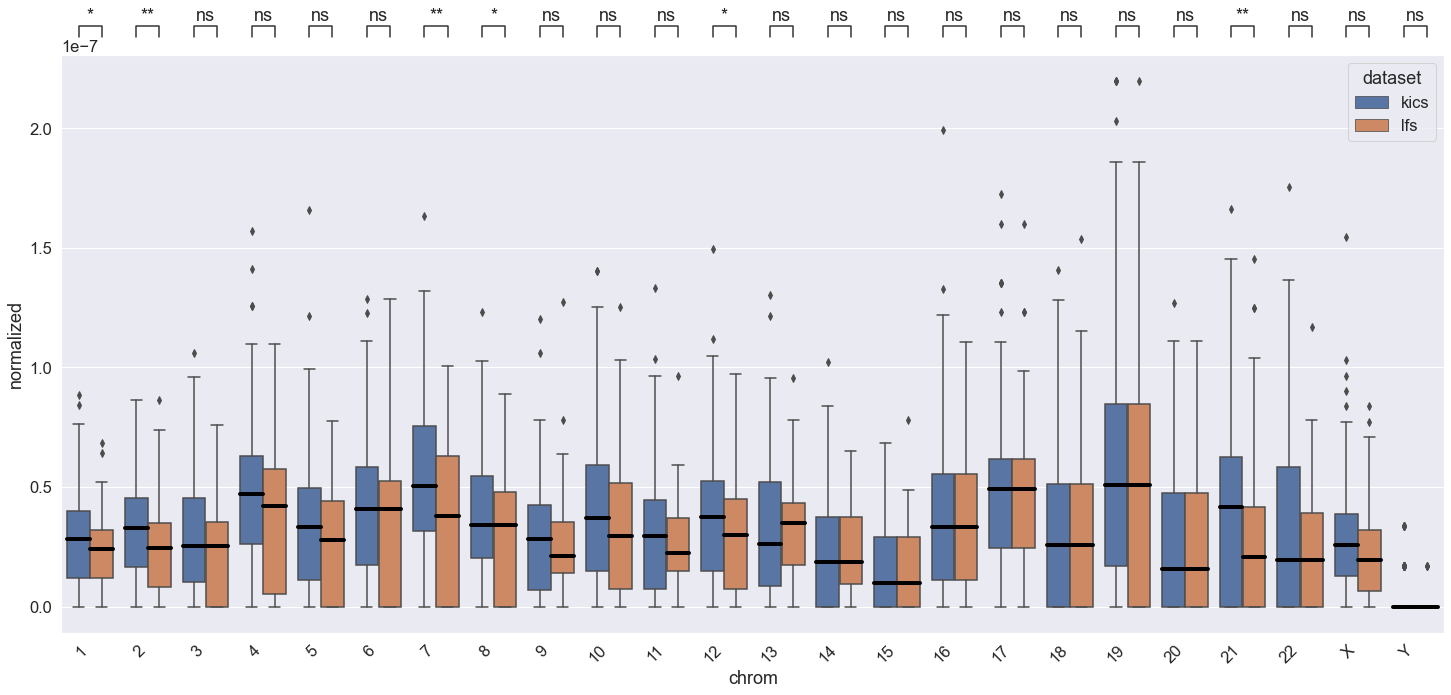

   chrom    normalized dataset
0      1  7.221647e-08    kics
1      2  4.111853e-08    kics
2      3  2.524966e-08    kics
3      4  8.370203e-08    kics
4      5  6.080195e-08    kics
..   ...           ...     ...
19    20  1.586659e-08    kics
20    21  1.038855e-07    kics
21    22  3.898289e-08    kics
22     X  1.288074e-08    kics
23     Y  1.684251e-08    kics

[5784 rows x 3 columns]


In [22]:
"""
Normalised and Regular Graph
"""
#rename things later and put into function/i but this is the statistical test T-T
newKdf, normKdf = formatDataFrame(kicsMore, grouping, numBPChrom, uniqueK, uniqueLabels, 'DEL')

newLdf, normLdf = formatDataFrame(lfsMore, grouping, numBPChrom, uniqueL, uniqueLabels, 'DEL')
createBoxplot(newKdf, normKdf, newLdf, normLdf)

print(normKdf)
#print()

## Duplication

LFS
     chrom  occ dataset
6528     1  3.0     lfs
6696     1  3.0     lfs
7200     1  4.0     lfs
7368     1  3.0     lfs
the outliers for 1 are:
None

     chrom  occ dataset
6937    10  3.0     lfs
7201    10  4.0     lfs
7225    10  4.0     lfs
the outliers for 10 are:
None

     chrom  occ dataset
7202    11  4.0     lfs
the outliers for 11 are:
None

Empty DataFrame
Columns: [chrom, occ, dataset]
Index: []
the outliers for 12 are:
None

     chrom  occ dataset
5788    13  1.0     lfs
6004    13  1.0     lfs
6052    13  1.0     lfs
6292    13  1.0     lfs
6364    13  1.0     lfs
6412    13  1.0     lfs
6556    13  1.0     lfs
6604    13  1.0     lfs
6748    13  1.0     lfs
6892    13  1.0     lfs
7204    13  2.0     lfs
7228    13  1.0     lfs
7540    13  1.0     lfs
7660    13  1.0     lfs
the outliers for 13 are:
None

     chrom  occ dataset
6365    14  2.0     lfs
6581    14  2.0     lfs
7085    14  2.0     lfs
7205    14  3.0     lfs
7589    14  2.0     lfs
7613    14  2.0  

3_kics vs. 3_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:1.358e-02 U_stat=1.163e+04
4_kics vs. 4_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:4.421e-01 U_stat=1.050e+04
5_kics vs. 5_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:1.155e-01 U_stat=1.096e+04
6_kics vs. 6_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:2.432e-03 U_stat=1.187e+04
7_kics vs. 7_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:6.487e-02 U_stat=1.113e+04
8_kics vs. 8_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:6.790e-02 U_stat=1.117e+04
9_kics vs. 9_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:5.180e-01 U_stat=1.042e+04
18_kics vs. 18_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:9.938e-01 U_stat=1.001e+04
19_kics vs. 19_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:4.774e-01 U_stat=1.045e+04
20_kics vs. 20_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:9.045e-01 U_stat=1.006e+04
21_kics vs. 21_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:1.184e-01 U_stat=9.242e+03
22_kics vs. 2

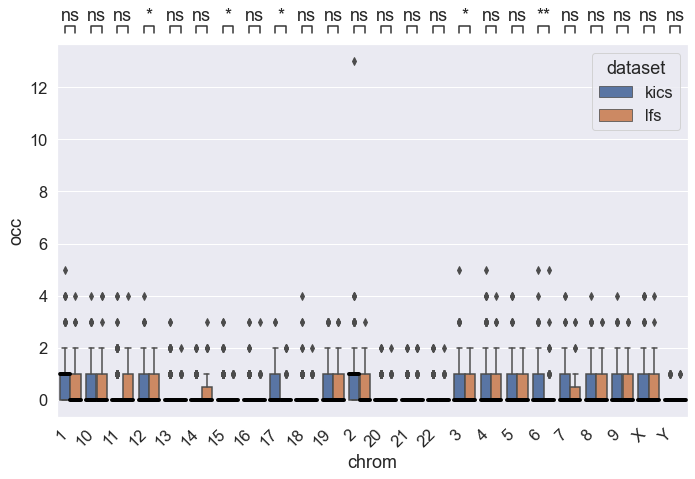

LFS
      index chrom    normalized dataset
5856      0     1  4.012026e-09     lfs
6096      0     1  4.012026e-09     lfs
6120      0     1  4.012026e-09     lfs
6144      0     1  4.012026e-09     lfs
6216      0     1  8.024052e-09     lfs
6240      0     1  4.012026e-09     lfs
6264      0     1  4.012026e-09     lfs
6288      0     1  4.012026e-09     lfs
6312      0     1  8.024052e-09     lfs
6360      0     1  8.024052e-09     lfs
6528      0     1  1.203608e-08     lfs
6552      0     1  8.024052e-09     lfs
6576      0     1  4.012026e-09     lfs
6600      0     1  4.012026e-09     lfs
6648      0     1  4.012026e-09     lfs
6672      0     1  4.012026e-09     lfs
6696      0     1  1.203608e-08     lfs
6768      0     1  4.012026e-09     lfs
6816      0     1  4.012026e-09     lfs
6840      0     1  4.012026e-09     lfs
6936      0     1  4.012026e-09     lfs
7032      0     1  4.012026e-09     lfs
7104      0     1  8.024052e-09     lfs
7128      0     1  4.012026e-09     

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10_kics vs. 10_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:9.166e-01 U_stat=1.007e+04
11_kics vs. 11_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:6.852e-01 U_stat=9.772e+03
12_kics vs. 12_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:3.180e-02 U_stat=1.134e+04
13_kics vs. 13_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:1.542e-01 U_stat=1.076e+04
14_kics vs. 14_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:4.578e-01 U_stat=9.600e+03
15_kics vs. 15_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:4.355e-02 U_stat=1.099e+04
16_kics vs. 16_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:1.084e-01 U_stat=1.079e+04
17_kics vs. 17_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:1.286e-02 U_stat=1.141e+04
18_kics vs. 18_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:9.938e-01 U_stat=1.001e+04


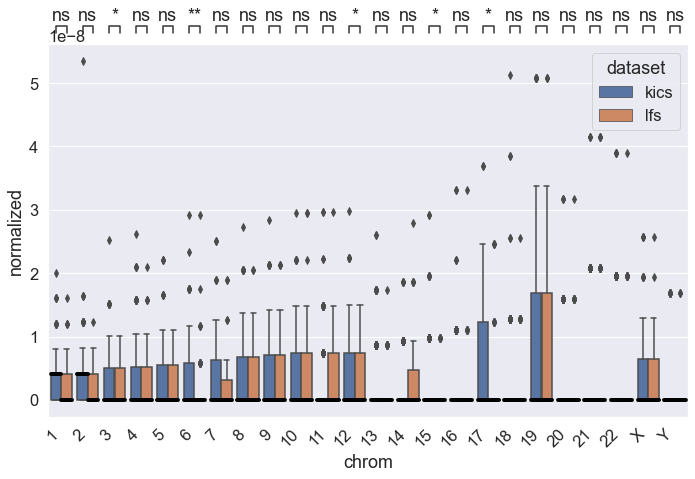

In [18]:
"""
Dup
"""
newKdf, normKdf = formatDataFrame(kicsMore, grouping, numBPChrom, uniqueK, uniqueLabels, 'DUP')
newLdf, normLdf = formatDataFrame(lfsMore, grouping, numBPChrom, uniqueL, uniqueLabels, 'DUP')

createBoxplot(newKdf, normKdf, newLdf, normLdf)

### Inversion

LFS
     chrom  occ dataset
5784     1  2.0     lfs
5832     1  1.0     lfs
5880     1  2.0     lfs
6192     1  1.0     lfs
6312     1  1.0     lfs
6432     1  1.0     lfs
6528     1  1.0     lfs
6552     1  1.0     lfs
6624     1  2.0     lfs
6648     1  1.0     lfs
6744     1  1.0     lfs
6768     1  1.0     lfs
6816     1  1.0     lfs
6912     1  1.0     lfs
6984     1  1.0     lfs
7224     1  1.0     lfs
7248     1  1.0     lfs
7368     1  2.0     lfs
7464     1  2.0     lfs
7680     1  1.0     lfs
the outliers for 1 are:
None

     chrom  occ dataset
6337    10  1.0     lfs
6361    10  1.0     lfs
6817    10  1.0     lfs
7105    10  1.0     lfs
7201    10  2.0     lfs
7273    10  4.0     lfs
7369    10  1.0     lfs
the outliers for 10 are:
None

     chrom  occ dataset
6218    11  3.0     lfs
the outliers for 11 are:
None

     chrom  occ dataset
5787    12  1.0     lfs
6123    12  1.0     lfs
6147    12  1.0     lfs
6363    12  3.0     lfs
6555    12  1.0     lfs
6771    12  1.0 

3_kics vs. 3_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:1.441e-01 U_stat=1.078e+04
4_kics vs. 4_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:9.531e-03 U_stat=1.146e+04
5_kics vs. 5_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:2.747e-01 U_stat=9.455e+03
6_kics vs. 6_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:1.185e-01 U_stat=1.099e+04
7_kics vs. 7_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:1.341e-01 U_stat=1.079e+04
8_kics vs. 8_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:3.024e-01 U_stat=1.048e+04
9_kics vs. 9_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:5.266e-01 U_stat=1.030e+04
18_kics vs. 18_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:2.854e-01 U_stat=1.039e+04
19_kics vs. 19_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:1.503e-01 U_stat=1.047e+04
20_kics vs. 20_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:1.529e-01 U_stat=1.047e+04
21_kics vs. 21_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:9.493e-01 U_stat=1.002e+04
22_kics vs. 2

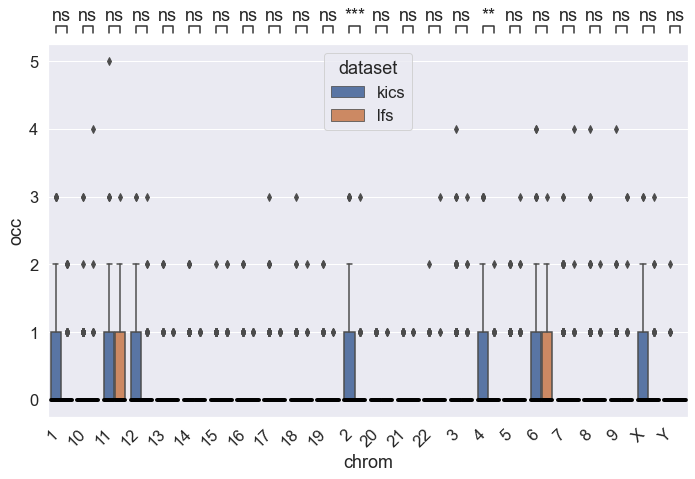

LFS
      index chrom    normalized dataset
5784      0     1  8.024052e-09     lfs
5832      0     1  4.012026e-09     lfs
5880      0     1  8.024052e-09     lfs
6192      0     1  4.012026e-09     lfs
6312      0     1  4.012026e-09     lfs
6432      0     1  4.012026e-09     lfs
6528      0     1  4.012026e-09     lfs
6552      0     1  4.012026e-09     lfs
6624      0     1  8.024052e-09     lfs
6648      0     1  4.012026e-09     lfs
6744      0     1  4.012026e-09     lfs
6768      0     1  4.012026e-09     lfs
6816      0     1  4.012026e-09     lfs
6912      0     1  4.012026e-09     lfs
6984      0     1  4.012026e-09     lfs
7224      0     1  4.012026e-09     lfs
7248      0     1  4.012026e-09     lfs
7368      0     1  8.024052e-09     lfs
7464      0     1  8.024052e-09     lfs
7680      0     1  4.012026e-09     lfs
the outliers for 1 are:
None

      index chrom    normalized dataset
5785      1     2  0.000000e+00     lfs
5809      1     2  0.000000e+00     lfs
5833  

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10_kics vs. 10_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:1.102e-01 U_stat=1.071e+04
11_kics vs. 11_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:2.181e-01 U_stat=1.078e+04
12_kics vs. 12_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:9.325e-02 U_stat=1.094e+04
13_kics vs. 13_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:8.016e-01 U_stat=9.916e+03
14_kics vs. 14_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:1.556e-01 U_stat=1.063e+04
15_kics vs. 15_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:4.778e-01 U_stat=9.661e+03
16_kics vs. 16_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:9.156e-01 U_stat=1.004e+04
17_kics vs. 17_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:5.304e-01 U_stat=1.028e+04
18_kics vs. 18_lfs: Mann-Whitney-Wilcoxon test two-sided, P_val:2.854e-01 U_stat=1.039e+04


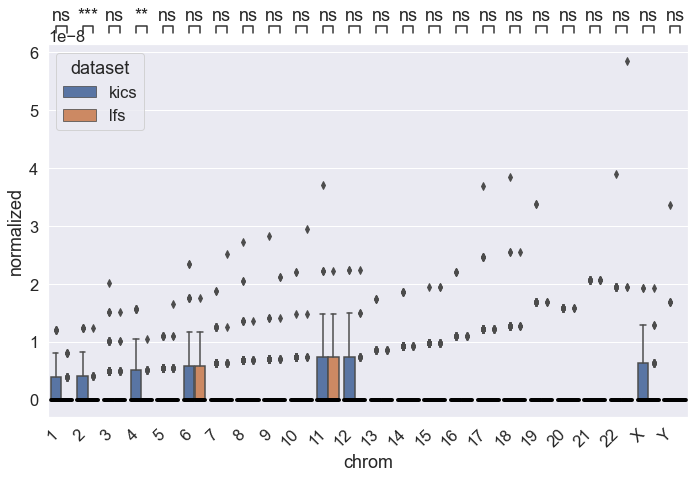

In [19]:
"""
INV
"""

newKdf, normKdf = formatDataFrame(kicsMore, grouping, numBPChrom, uniqueK, uniqueLabels, 'INV')
newLdf, normLdf = formatDataFrame(lfsMore, grouping, numBPChrom, uniqueL, uniqueLabels, 'INV')

createBoxplot(newKdf, normKdf, newLdf, normLdf)

MannwhitneyuResult(statistic=239045793099.5, pvalue=0.3996746287296191)


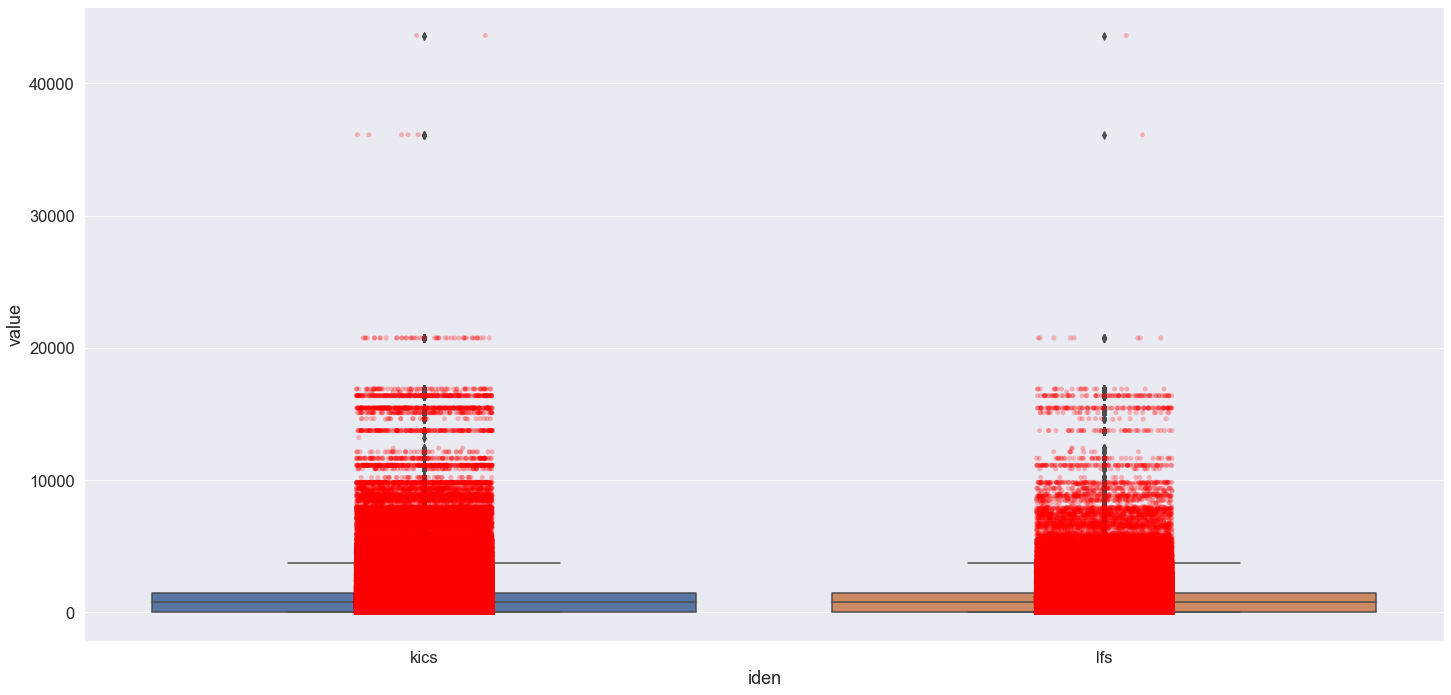

In [20]:
""" 
filter the df for CDS_length
"""

kicsSVR = kicsSVdf.loc[(kicsSVdf['AnnotSV type'] == 'split')& (kicsSVdf['GD_AF'] < 0.01) & (kicsSVdf['GD_AF'] >=0)] 
lfsSVR = lfsSVdf.loc[(lfsSVdf['AnnotSV type'] == 'split') & (lfsSVdf['GD_AF'] < 0.01) & (lfsSVdf['GD_AF'] >=0)]


mergedCDSdf = pd.DataFrame(data = {'kics':kicsSVR['CDS length'], 'lfs':lfsSVR['CDS length']})
boxplotPoints(titles, columns, mergedCDSdf, sizeV = 10)
#print(mergedCDSdf.head(50)) #they look the same